For constructing quantum circuits we have to import QuantumCiruit from qiskit

In [1]:
from qiskit import QuantumCircuit
qc=QuantumCircuit()

For including register in the circuit

In [2]:
from qiskit import QuantumRegister
qr = QuantumRegister(2,'a')

Now we add these register in the circuit as follows,

In [3]:
qc.add_register(qr)

In [4]:
qc.qregs   ## qc.qregs is for displaying

[QuantumRegister(2, 'a')]

In [5]:
qc.draw()

a_0: 
     
a_1:

Now we apply gates on the cicuit

In [6]:
qc.h(qr[0])   ## applying Hadamard gate on the first qubit


In [7]:
qc.draw()

┌───┐
a_0: ┤ H ├
     └───┘
a_1: ─────

In [ ]:
#qc.x(qr[0]) ## applying Hadamard gate on the first qubit
#qc.draw()

In [8]:
qc.cx(qr[1], qr[0])
qc.draw()

┌───┐┌───┐
a_0: ┤ H ├┤ X ├
     └───┘└─┬─┘
a_1: ───────■──

In [10]:
from qiskit import Aer
sv_sim = Aer.get_backend('aer_simulator')    ##it is simulator for showing output

In [11]:
for backend in Aer.backends():     
    print(backend)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [12]:
from qiskit import assemble
qc.save_statevector()         ## this converts output in to state vector
qobj = assemble(qc)           ## this assembles quantum circuit
job = sv_sim.run(qobj)         ## this is for running the job

In [13]:
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
(0.7071067811865475+0j)
0j
0j


/tmp/ipykernel_28880/1647773364.py:2: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for amplitude in ket:


In [14]:
new_qc = QuantumCircuit(qr)

new_qc.initialize(ket, qr)

In [15]:
new_qc.x(qr[0]) 

In [16]:
from qiskit import assemble
new_qc.save_statevector()         ## this converts output in to state vector
qobj = assemble(new_qc)           ## this assembles quantum circuit
job = sv_sim.run(qobj) 
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865475+0j)
(0.7071067811865476+0j)
0j
0j


/tmp/ipykernel_28880/3308903925.py:6: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for amplitude in ket:


Note that quantum register is for doing quantum operations and we have to use classical register for measuring the qubits.

In [17]:
from qiskit import ClassicalRegister
cr = ClassicalRegister(2,'creg')

qc.add_register(cr)

In [18]:
qc.measure(qr[0],cr[0])     ##measuring first quibit on first classical register
qc.measure(qr[1],cr[1])    ##measuring second quibit on second classical register

qc.draw()

┌───┐┌───┐ statevector ┌─┐   
   a_0: ┤ H ├┤ X ├──────░──────┤M├───
        └───┘└─┬─┘      ░      └╥┘┌─┐
   a_1: ───────■────────░───────╫─┤M├
                        ░       ║ └╥┘
creg: 2/════════════════════════╩══╩═
                                0  1

In [19]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, shots=100)      ##shots is the number of experiments
job = aer_sim.run(qobj, memory=True)                ##.run is for running the experiments

In [20]:
hist = job.result().get_counts()
print(hist)

{'00': 43, '01': 57}


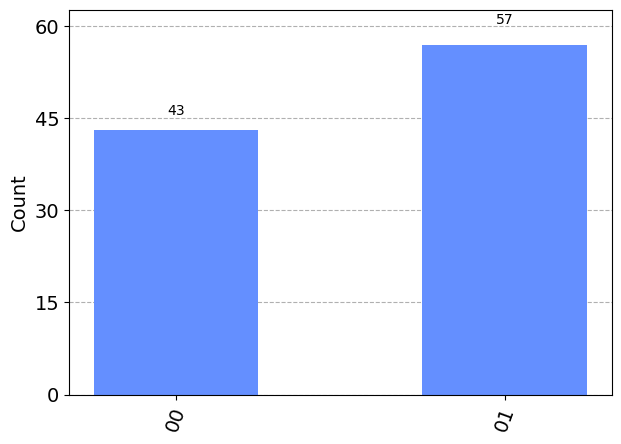

In [21]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

In [22]:
samples = job.result().get_memory()    #to get result of each experiment as a result
print(samples)

['01', '00', '01', '01', '00', '00', '01', '01', '01', '01', '00', '01', '00', '00', '01', '01', '00', '00', '00', '00', '01', '01', '01', '01', '01', '01', '00', '00', '00', '00', '00', '01', '01', '01', '01', '00', '01', '01', '00', '00', '00', '00', '00', '01', '01', '01', '00', '01', '01', '01', '00', '01', '00', '01', '00', '00', '00', '01', '01', '01', '01', '01', '01', '00', '01', '01', '00', '01', '01', '00', '00', '01', '00', '01', '01', '00', '01', '01', '00', '01', '01', '00', '00', '01', '00', '00', '01', '01', '00', '00', '01', '01', '01', '01', '00', '01', '01', '00', '00', '01']


Note that the bits are labelled from right to left. So cr[0] is the one to the furthest right, and so on. As an example of this, here's an 8 qubit circuit with a Pauli  on only the qubit numbered 7, which has its output stored to the bit numbered 7.

In [23]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
qc_2 = QuantumCircuit(qubit,bit)

qc_2.x(qubit[7])
qc_2.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

qobj = assemble(qc_2, shots=8192)
aer_sim.run(qobj).result().get_counts()

{'10000000': 8192}

If we need more than one quantum register and classical register in the circuit then we can do as follows,

In [24]:
qc = QuantumCircuit(2,1)     ## where first arguments is corresponding to number of quantum regsiter and second
                             ##argument is corresponding to the number of classical register.

In [25]:
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw()

┌───┐        
q_0: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_1: ─────┤ X ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

## Creating custom gates


Custom gates works as function or subroutine, we construct the subcircuit and we can use that part of the circuit
whenever we need it.

In [26]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw()

q_0: ──■─────────■───────
     ┌─┴─┐     ┌─┴─┐     
q_1: ┤ X ├──■──┤ X ├──■──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ─────┤ X ├─────┤ X ├
          └───┘     └───┘

In [27]:
toggle_cx = sub_circuit.to_instruction()   ##we convert this circuit to the custom gate

In [28]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3] ])

new_qc.draw()

q1_0: ──────────────
      ┌────────────┐
q1_1: ┤0           ├
      │            │
q1_2: ┤1 toggle_cx ├
      │            │
q1_3: ┤2           ├
      └────────────┘